# Import Libraries

In [3]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

# Import Data

In [18]:
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [19]:
df.shape

(777, 18)

# Preprocessing data

In [20]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [21]:
df.dtypes

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [22]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [23]:
df.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

In [26]:
df.drop('Row#',axis=1,inplace=True)

# Univariate analysis

In [27]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric','Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], df[col].mean(), df[col].min(),
                                  df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), 
                                  df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], '-', '-', 
                                  '-', '-', '-',
                                  '-', '-', '-', '-']
            
    return output_df.sort_values(by = ['Numeric', 'Skew', 'Unique'], ascending = False)

In [28]:
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
honeybee,777,0,7,float64,True,0.250000,0.417133,0.000000,0.250000,0.250000,0.500000,18.430000,0.978904,16.760583,299.012420
clonesize,777,0,6,float64,True,12.500000,18.767696,10.000000,12.500000,12.500000,25.000000,40.000000,6.999063,0.575375,-0.625690
andrena,777,0,12,float64,True,0.380000,0.468817,0.000000,0.380000,0.500000,0.630000,0.750000,0.161052,0.186850,-0.661690
bumbles,777,0,10,float64,True,0.250000,0.282389,0.000000,0.250000,0.250000,0.380000,0.585000,0.066343,0.153441,1.707386
AverageRainingDays,777,0,5,float64,True,0.260000,0.320000,0.060000,0.100000,0.260000,0.390000,0.560000,0.171279,0.072518,-1.275824
AverageOfLowerTRange,777,0,5,float64,True,50.800000,48.613127,41.200000,45.800000,50.800000,50.800000,55.900000,5.417072,-0.005807,-1.336925
MinOfLowerTRange,777,0,5,float64,True,30.000000,28.690219,24.300000,27.000000,30.000000,30.000000,33.000000,3.209547,-0.008517,-1.343206
MaxOfUpperTRange,777,0,5,float64,True,86.000000,82.277091,69.700000,77.400000,86.000000,89.000000,94.600000,9.193745,-0.012187,-1.347745
MinOfUpperTRange,777,0,5,float64,True,52.000000,49.700515,39.000000,46.800000,52.000000,52.000000,57.200000,5.595769,-0.015516,-1.338593
AverageOfUpperTRange,777,0,5,float64,True,71.900000,68.723037,58.200000,64.700000,71.900000,71.900000,79.000000,7.676984,-0.016695,-1.346183


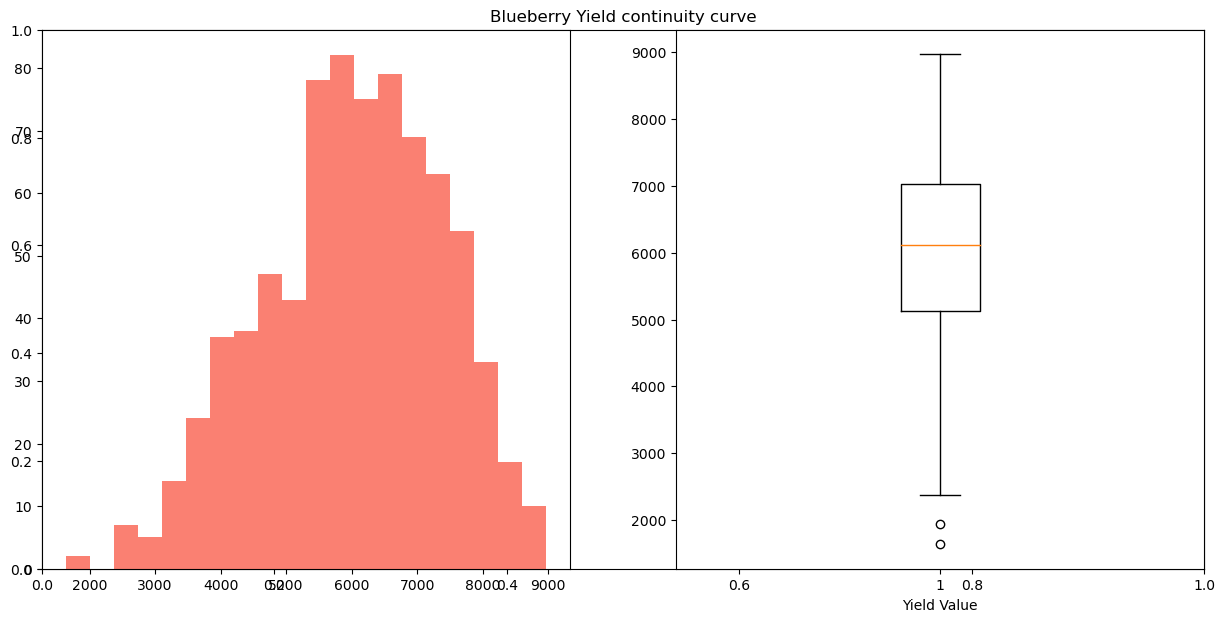

In [29]:
figs = plt.figure(figsize=(15,7))
plt.title("Blueberry Yield continuity curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df["yield"]
plt.xlabel("Yield Value")
ax1.hist(x, bins=20, color="salmon")
ax2.boxplot(x);

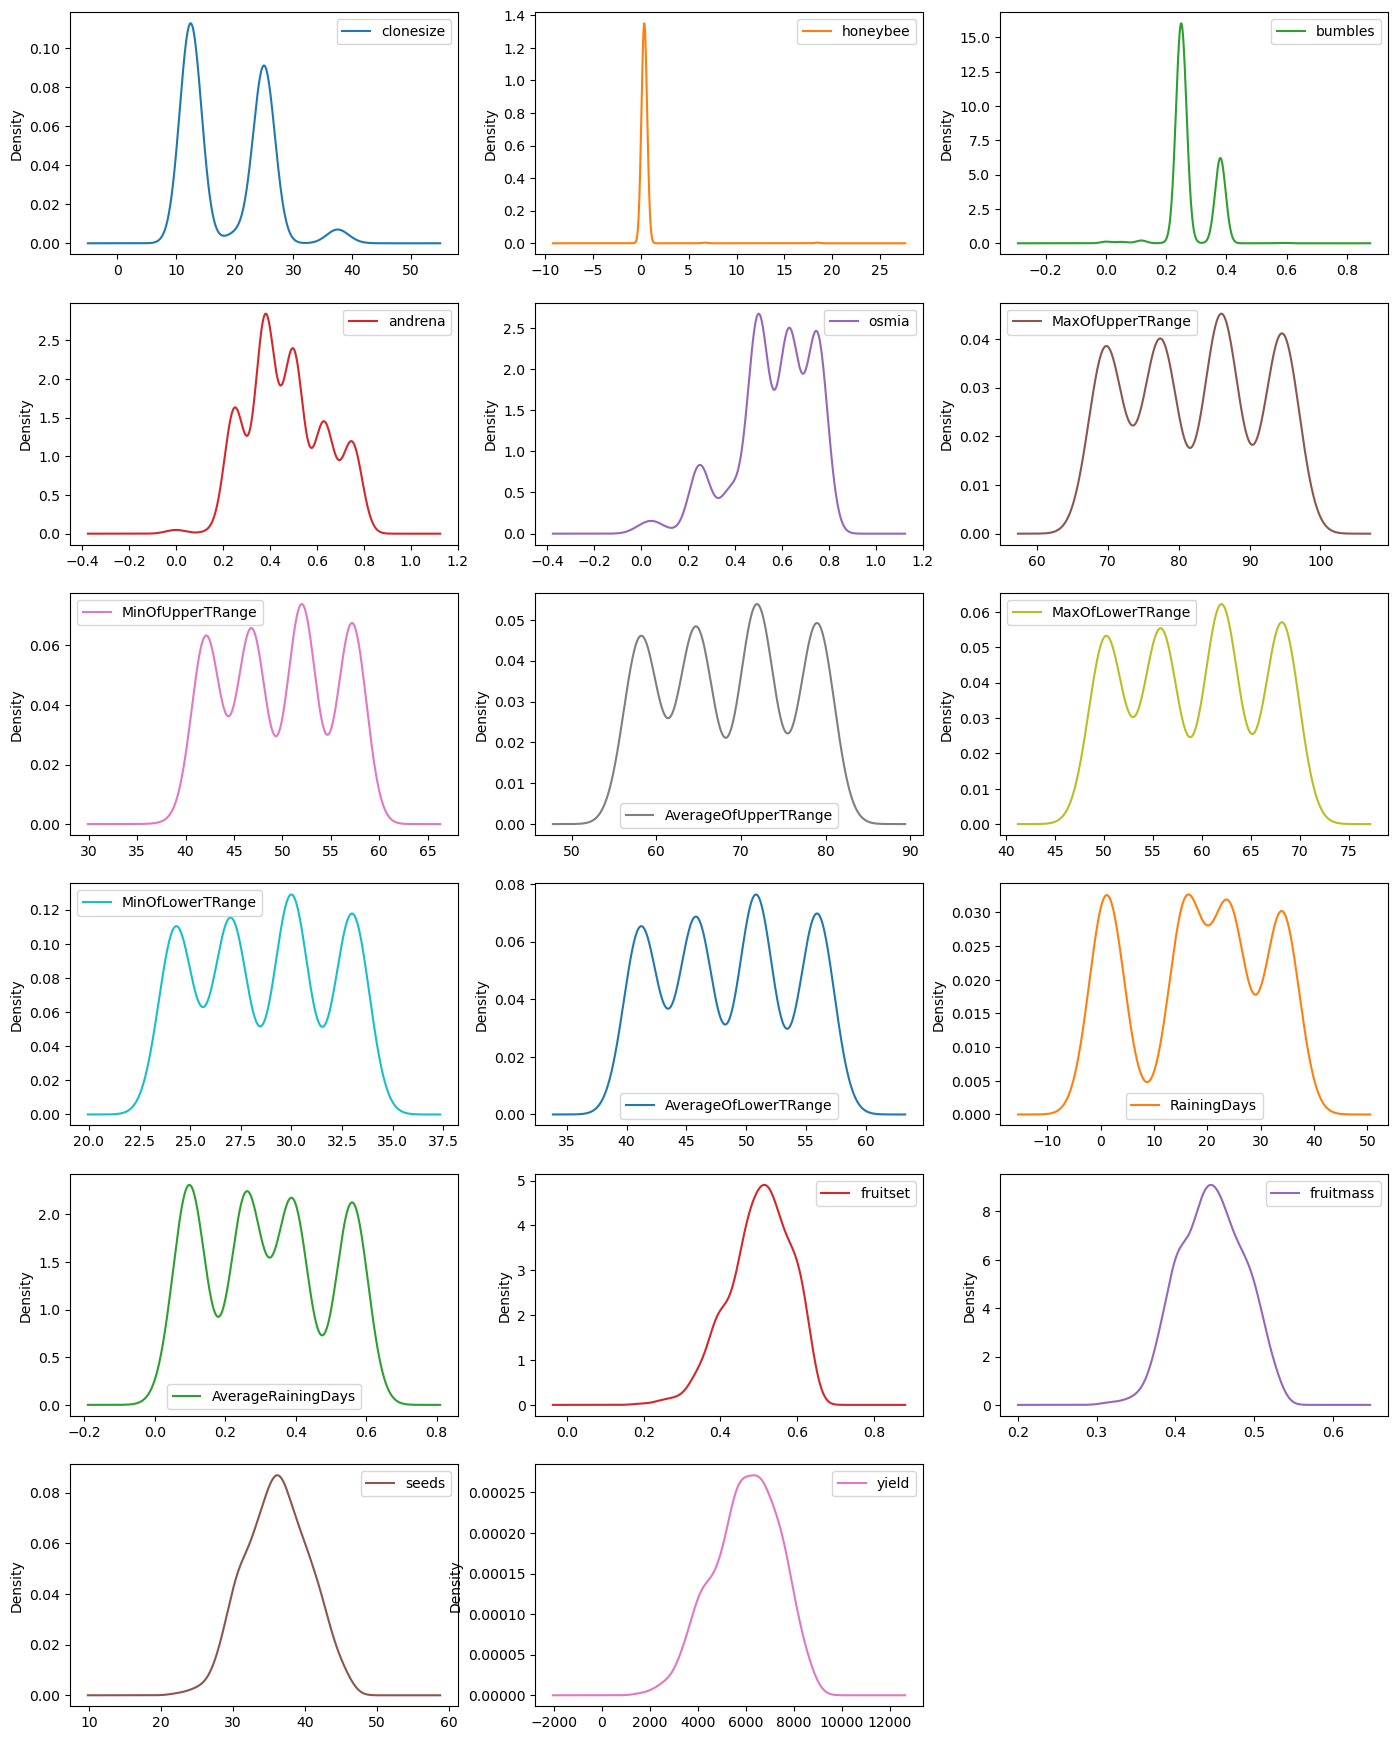

In [30]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

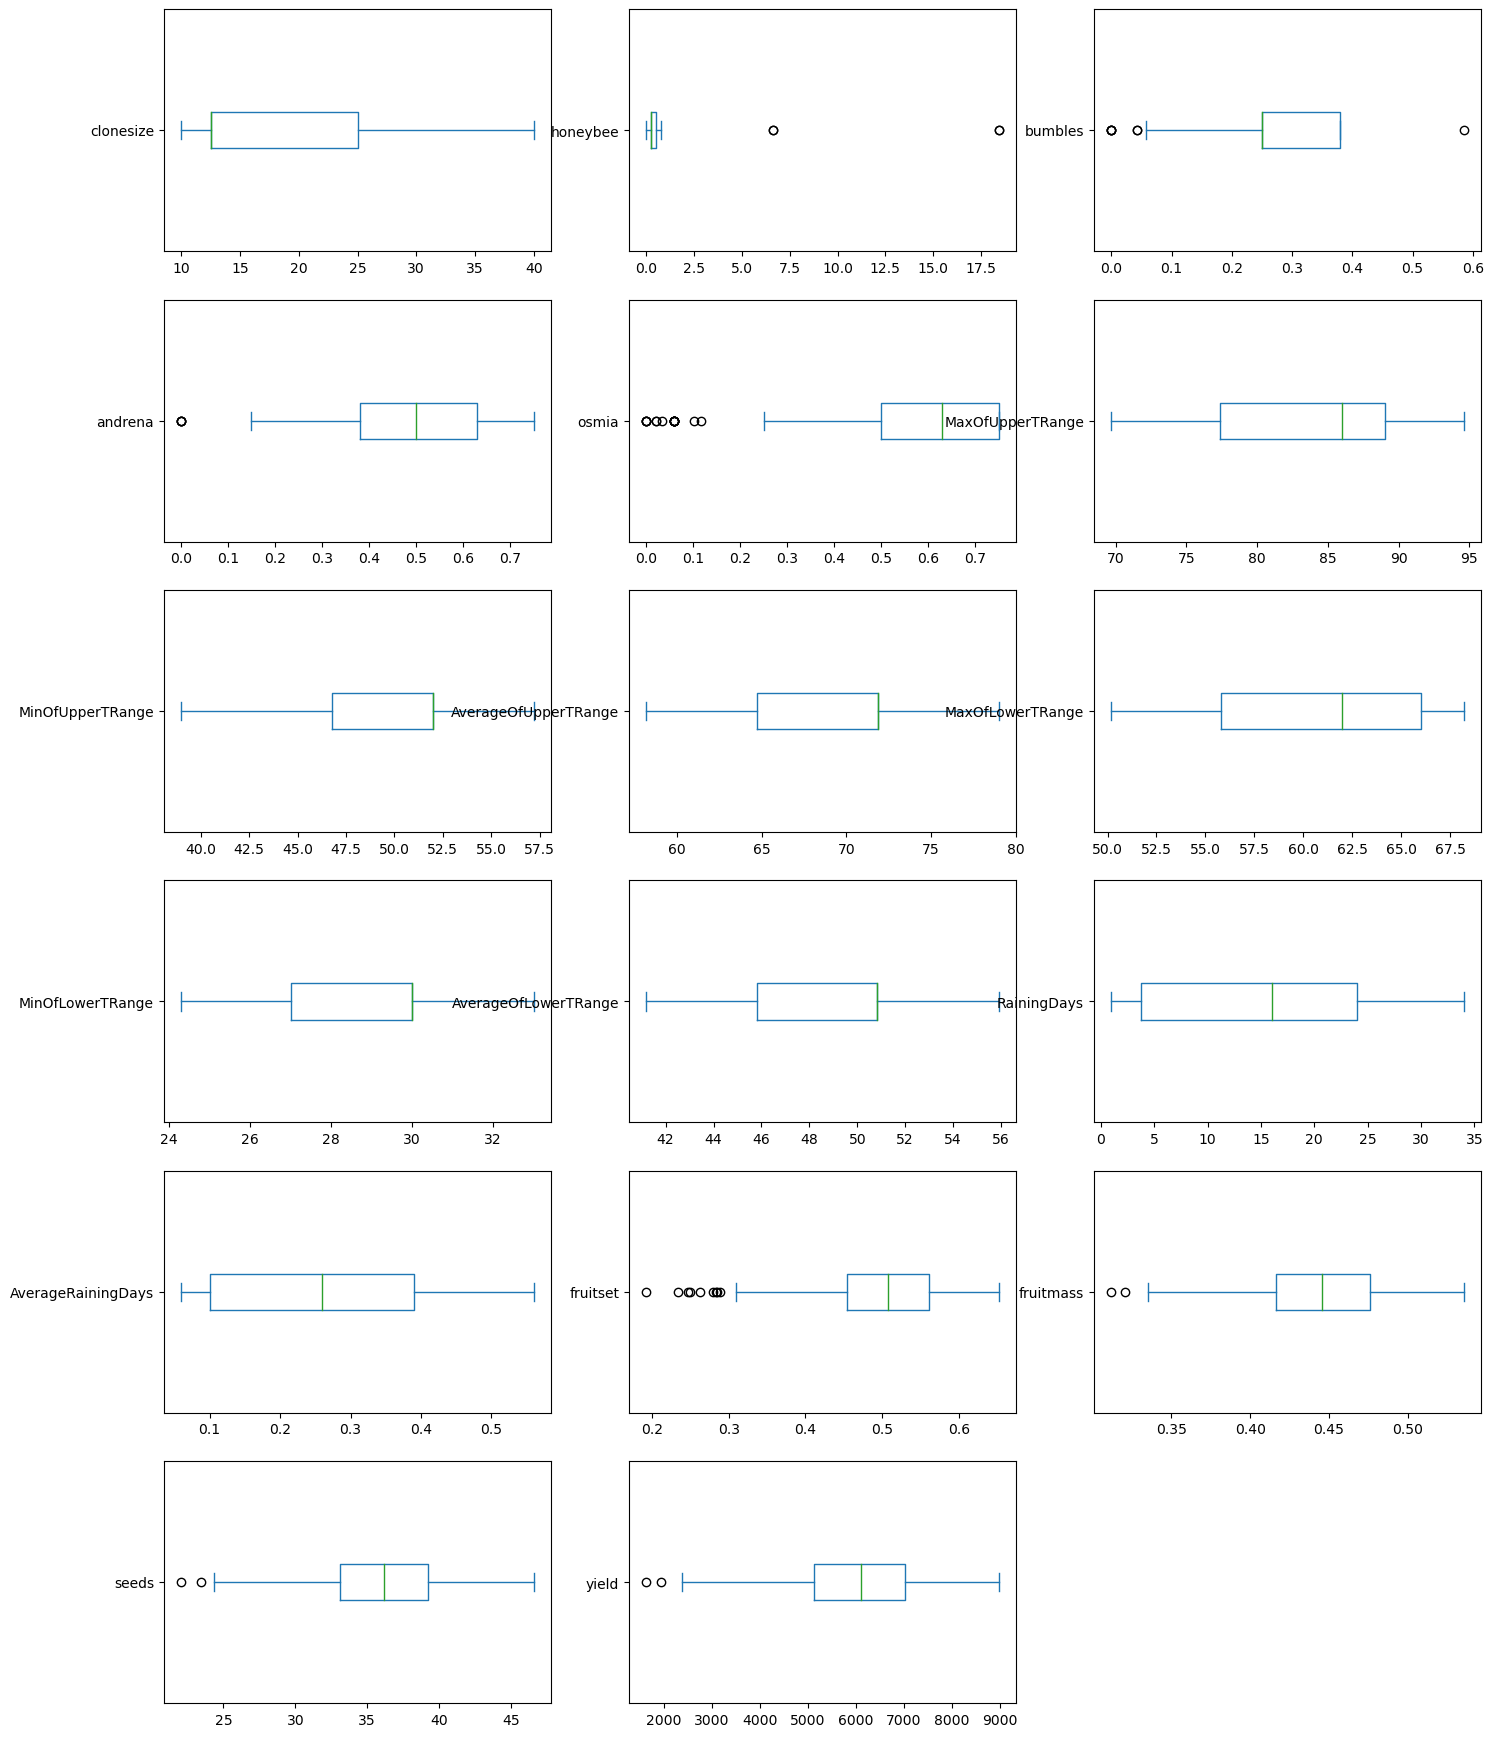

In [31]:
df.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

# Multivariate Analysis

<Axes: >

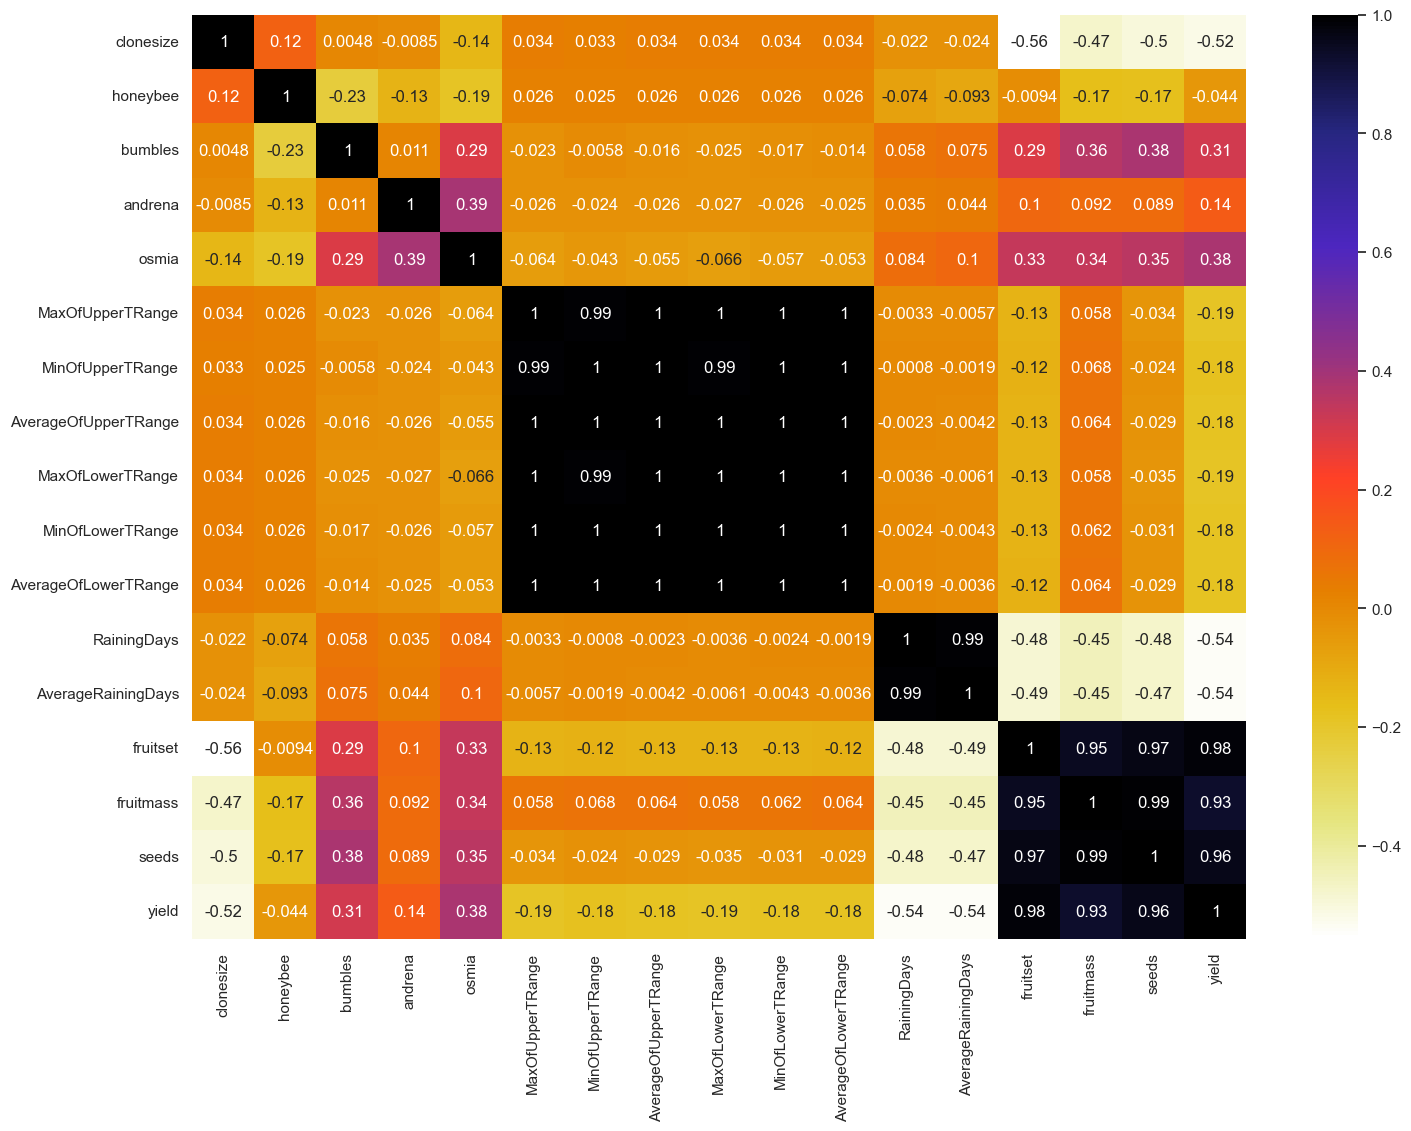

In [33]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [34]:
df1 = df.drop(columns=['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
df1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [36]:
X = df1.drop(columns=['yield'])
y = df1[['yield']]

In [37]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [39]:
df2 = df1[~((df1.lt(Q1 - 1.5 * IQR)) | (df1.gt(Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(759, 8)

In [40]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)    


def Chisquare(df, feature, label):
    import pandas as pd
    import scipy.stats
    ct = pd.crosstab(index = df[feature], columns=df[label])
    chi2, p,dof,_ = scipy.stats.chi2_contingency([ct.iloc[0].values, ct.iloc[1].values])
    return chi2,p
    
    
def T(df, feature, label): 
    import pandas as pd
    import numpy as np
    from scipy import stats
    partial_high_school = df[df[feature] == (df[feature].unique()[0])]
    high_school = df[df[feature] == (df[feature].unique()[1])]
    t, p = stats.ttest_ind(partial_high_school[label],high_school[label] )
    return t,p

def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
#   Create an empty Dataframe to store the output
    output_df = pd.DataFrame(columns = ['Stat_r', '+/-_F', 'Effect_size_X^2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[label]):
                    r, p = stats.pearsonr(df[label], df[col])
                    if r > 0:
                        output_df.loc[col] = ['r', '+', abs(round(r, 3)), round(p, 6)]
                    else:
                        output_df.loc[col] = ['r', '-', abs(round(r, 3)), round(p, 6)]
                elif((pd.api.types.is_numeric_dtype(df[label])) and not (pd.api.types.is_numeric_dtype(df[col])) and (df[col].nunique()==2)):
                        t, p = T(df[[col,label]],col,label)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                elif((pd.api.types.is_numeric_dtype(df[col])) and not (pd.api.types.is_numeric_dtype(df[label])) and (df[label].nunique()==2)):
                        t, p = T(df[[col, label]],label,col)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                elif (pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique()!=2):
                    F, p = anova(df[[col, label]],col,label)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                elif  (pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_numeric_dtype(df[label])):
                    F, p = anova(df[[col, label]],label,col)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                elif (not pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) ):
                    try:
                        X, p = Chisquare(df[[col, label]],col,label)
                        output_df.loc[col] = ['X','',round(X,3),round(p,6) ]
                    except:
                        pass
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'Nulls']
    
    return output_df.sort_values(by=['Effect_size_X^2','Stat_r'],ascending=[False,False])

In [42]:
bivstats(df1, 'yield')

,Stat_r,+/-_F,Effect_size_X^2,p-value
AverageRainingDays,r,-,0.541,0.000000
clonesize,r,-,0.517,0.000000
osmia,r,+,0.381,0.000000
bumbles,r,+,0.309,0.000000
AverageOfUpperTRange,r,-,0.182,0.000000
AverageOfLowerTRange,r,-,0.181,0.000000
andrena,r,+,0.140,0.000087


# Building ml model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(543, 7) (234, 7) (543, 1) (234, 1)


In [44]:
from flaml import AutoML

In [53]:
# %%script false --no-raise-error
# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": 'yield.log', 
}

In [54]:
automl.fit(
    X_train=X_train.to_numpy(),
    y_train=y_train.to_numpy(),
    **automl_settings
)

[flaml.automl.logger: 05-21 00:49:17] {1693} INFO - task = regression
[flaml.automl.logger: 05-21 00:49:17] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 05-21 00:49:17] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 05-21 00:49:17] {1801} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 05-21 00:49:17] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 05-21 00:49:17] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-21 00:49:17] {2347} INFO - Estimated sufficient time budget=635s. Estimated necessary time budget=4s.
[flaml.automl.logger: 05-21 00:49:17] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.7054,	best estimator lgbm's best error=0.7054
[flaml.automl.logger: 05-21 00:49:17] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-21 00:49:17] {2394} INFO -  at 0.2s,	estimator lgbm's best error=0.7054,	best estimator 

[flaml.automl.logger: 05-21 00:49:21] {2221} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 05-21 00:49:21] {2394} INFO -  at 4.0s,	estimator lgbm's best error=0.0791,	best estimator lgbm's best error=0.0791
[flaml.automl.logger: 05-21 00:49:21] {2221} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 05-21 00:49:21] {2394} INFO -  at 4.1s,	estimator xgboost's best error=0.1325,	best estimator lgbm's best error=0.0791
[flaml.automl.logger: 05-21 00:49:21] {2221} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 05-21 00:49:22] {2394} INFO -  at 4.3s,	estimator extra_tree's best error=0.2245,	best estimator lgbm's best error=0.0791
[flaml.automl.logger: 05-21 00:49:22] {2221} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 05-21 00:49:22] {2394} INFO -  at 4.4s,	estimator xgboost's best error=0.1325,	best estimator lgbm's best error=0.0791
[flaml.automl.logger: 05-21 00:49:22] {2221} INFO - iteration 38, current le

[flaml.automl.logger: 05-21 00:49:25] {2221} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 05-21 00:49:25] {2394} INFO -  at 7.4s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl.logger: 05-21 00:49:25] {2221} INFO - iteration 71, current learner lgbm
[flaml.automl.logger: 05-21 00:49:25] {2394} INFO -  at 7.4s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl.logger: 05-21 00:49:25] {2221} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 05-21 00:49:25] {2394} INFO -  at 7.6s,	estimator extra_tree's best error=0.1447,	best estimator lgbm's best error=0.0663
[flaml.automl.logger: 05-21 00:49:25] {2221} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 05-21 00:49:25] {2394} INFO -  at 7.7s,	estimator lgbm's best error=0.0663,	best estimator lgbm's best error=0.0663
[flaml.automl.logger: 05-21 00:49:25] {2221} INFO - iteration 74, current learner extra_

[flaml.automl.logger: 05-21 00:49:31] {2221} INFO - iteration 106, current learner extra_tree
[flaml.automl.logger: 05-21 00:49:31] {2394} INFO -  at 13.6s,	estimator extra_tree's best error=0.0993,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:31] {2221} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 05-21 00:49:31] {2394} INFO -  at 13.7s,	estimator lgbm's best error=0.0653,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:31] {2221} INFO - iteration 108, current learner extra_tree
[flaml.automl.logger: 05-21 00:49:31] {2394} INFO -  at 14.0s,	estimator extra_tree's best error=0.0993,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:31] {2221} INFO - iteration 109, current learner rf
[flaml.automl.logger: 05-21 00:49:31] {2394} INFO -  at 14.2s,	estimator rf's best error=0.1151,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:31] {2221} INFO - iteration 110, curre

[flaml.automl.logger: 05-21 00:49:37] {2394} INFO -  at 19.5s,	estimator xgb_limitdepth's best error=0.0805,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:37] {2221} INFO - iteration 142, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:37] {2394} INFO -  at 19.6s,	estimator xgb_limitdepth's best error=0.0805,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:37] {2221} INFO - iteration 143, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:37] {2394} INFO -  at 19.6s,	estimator xgb_limitdepth's best error=0.0805,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:37] {2221} INFO - iteration 144, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:37] {2394} INFO -  at 19.7s,	estimator xgb_limitdepth's best error=0.0805,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:37] {2221} INFO - iteration 145, current learner xgb_limitdepth
[flaml.autom

[flaml.automl.logger: 05-21 00:49:42] {2394} INFO -  at 24.8s,	estimator xgb_limitdepth's best error=0.0772,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:42] {2221} INFO - iteration 177, current learner xgboost
[flaml.automl.logger: 05-21 00:49:42] {2394} INFO -  at 24.9s,	estimator xgboost's best error=0.0728,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:42] {2221} INFO - iteration 178, current learner xgboost
[flaml.automl.logger: 05-21 00:49:42] {2394} INFO -  at 25.0s,	estimator xgboost's best error=0.0728,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:42] {2221} INFO - iteration 179, current learner xgboost
[flaml.automl.logger: 05-21 00:49:42] {2394} INFO -  at 25.1s,	estimator xgboost's best error=0.0728,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:42] {2221} INFO - iteration 180, current learner xgboost
[flaml.automl.logger: 05-21 00:49:42] {2394} INFO -  at 25.2s

[flaml.automl.logger: 05-21 00:49:47] {2394} INFO -  at 29.8s,	estimator xgboost's best error=0.0728,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:47] {2221} INFO - iteration 212, current learner xgboost
[flaml.automl.logger: 05-21 00:49:47] {2394} INFO -  at 29.9s,	estimator xgboost's best error=0.0728,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:47] {2221} INFO - iteration 213, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:47] {2394} INFO -  at 30.1s,	estimator xgb_limitdepth's best error=0.0699,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:47] {2221} INFO - iteration 214, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:47] {2394} INFO -  at 30.3s,	estimator xgb_limitdepth's best error=0.0699,	best estimator lgbm's best error=0.0653
[flaml.automl.logger: 05-21 00:49:47] {2221} INFO - iteration 215, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49

[flaml.automl.logger: 05-21 00:49:53] {2221} INFO - iteration 244, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:53] {2394} INFO -  at 35.9s,	estimator xgb_limitdepth's best error=0.0643,	best estimator xgb_limitdepth's best error=0.0643
[flaml.automl.logger: 05-21 00:49:53] {2221} INFO - iteration 245, current learner xgboost
[flaml.automl.logger: 05-21 00:49:53] {2394} INFO -  at 36.1s,	estimator xgboost's best error=0.0728,	best estimator xgb_limitdepth's best error=0.0643
[flaml.automl.logger: 05-21 00:49:53] {2221} INFO - iteration 246, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:53] {2394} INFO -  at 36.3s,	estimator xgb_limitdepth's best error=0.0643,	best estimator xgb_limitdepth's best error=0.0643
[flaml.automl.logger: 05-21 00:49:53] {2221} INFO - iteration 247, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:49:54] {2394} INFO -  at 36.5s,	estimator xgb_limitdepth's best error=0.0643,	best estimator xgb_limitdepth's best

[flaml.automl.logger: 05-21 00:50:00] {2221} INFO - iteration 277, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:00] {2394} INFO -  at 42.6s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:00] {2221} INFO - iteration 278, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:00] {2394} INFO -  at 42.8s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:00] {2221} INFO - iteration 279, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:00] {2394} INFO -  at 43.0s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:00] {2221} INFO - iteration 280, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:00] {2394} INFO -  at 43.1s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_lim

[flaml.automl.logger: 05-21 00:50:06] {2221} INFO - iteration 310, current learner xgboost
[flaml.automl.logger: 05-21 00:50:07] {2394} INFO -  at 49.4s,	estimator xgboost's best error=0.0663,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:07] {2221} INFO - iteration 311, current learner xgboost
[flaml.automl.logger: 05-21 00:50:07] {2394} INFO -  at 49.7s,	estimator xgboost's best error=0.0663,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:07] {2221} INFO - iteration 312, current learner xgboost
[flaml.automl.logger: 05-21 00:50:07] {2394} INFO -  at 49.8s,	estimator xgboost's best error=0.0663,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:07] {2221} INFO - iteration 313, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:07] {2394} INFO -  at 50.0s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.

[flaml.automl.logger: 05-21 00:50:16] {2394} INFO -  at 59.0s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:16] {2221} INFO - iteration 344, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:16] {2394} INFO -  at 59.2s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:16] {2221} INFO - iteration 345, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:17] {2394} INFO -  at 59.3s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:17] {2221} INFO - iteration 346, current learner xgb_limitdepth
[flaml.automl.logger: 05-21 00:50:17] {2394} INFO -  at 59.5s,	estimator xgb_limitdepth's best error=0.0631,	best estimator xgb_limitdepth's best error=0.0631
[flaml.automl.logger: 05-21 00:50:17] {2221} INFO - iteration 347, cur

In [61]:
print(str(automl.model.estimator))

XGBRegressor(base_score=None, booster=None, callbacks=[],
             colsample_bylevel=0.8597771570987853, colsample_bynode=None,
             colsample_bytree=0.8754779170108284, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1182317605360254,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7.645970023132531, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=-1,
             num_parallel_tree=None, predictor=None, random_state=None, ...)


In [58]:
'''pickle and save the automl object'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [67]:
regressor = XGBRegressor(base_score=None, booster=None, callbacks=[],
                         colsample_bylevel=0.8597771570987853, colsample_bynode=None,
                         colsample_bytree=0.8754779170108284, early_stopping_rounds=None,
                         enable_categorical=False, eval_metric=None, feature_types=None,
                         gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                         interaction_constraints=None, learning_rate=0.1182317605360254,
                         max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                         max_delta_step=None, max_depth=5, max_leaves=None,
                         min_child_weight=7.645970023132531,
                         monotone_constraints=None, n_estimators=50, n_jobs=-1,
                         num_parallel_tree=None, predictor=None, random_state=None)

In [68]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=[],
             colsample_bylevel=0.8597771570987853, colsample_bynode=None,
             colsample_bytree=0.8754779170108284, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1182317605360254,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7.645970023132531, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=-1,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [69]:
y_pred = regressor.predict(X_test)

In [71]:
r2_score(y_test, y_pred)

0.9624787151010331

In [72]:
from xgboost import plot_importance

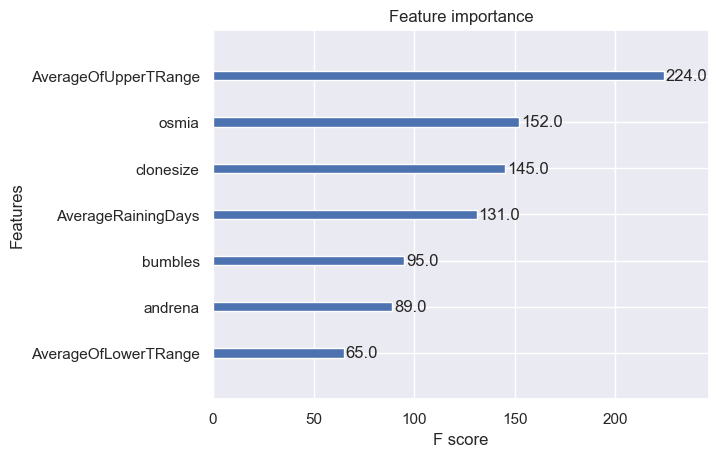

In [74]:
# plot feature importance
plot_importance(regressor)
plt.show()

# Model Explainability

In [75]:
shap.initjs()

In [77]:
sample_set = X_test.sample(100)

In [78]:
shap_values = shap.TreeExplainer(regressor).shap_values(sample_set)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


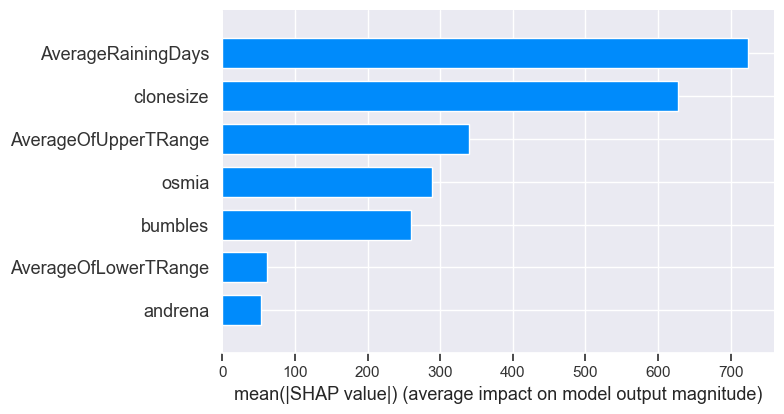

In [79]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


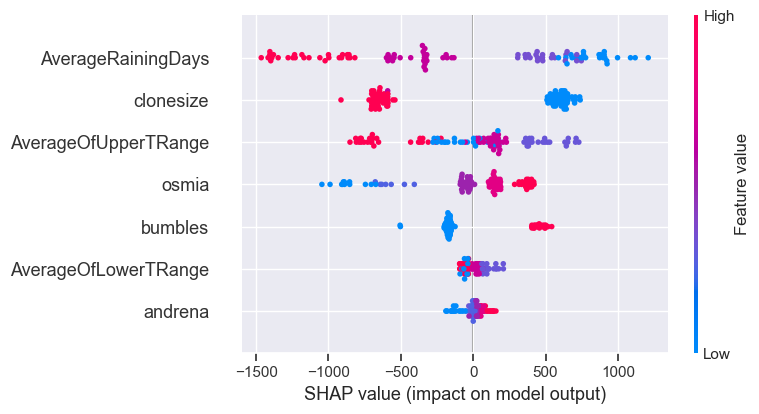

In [80]:
shap.summary_plot(shap_values, sample_set)